___

___
# Linear Regression 
##Dataset

**dataset link :** https://www.kaggle.com/kolawale/focusing-on-mobile-app-or-website?select=Ecommerce+Customers

This dataset has information about few persons 'Email Id' , 'Address','Avatar,'Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership', 'Yearly Amount Spent'.
It has data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [107]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("Ecommerce Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
len(df) #rows

500

In [5]:
df.columns #columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
df.isnull().sum()
#no missing values in our data

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Exploratory Data Analysis


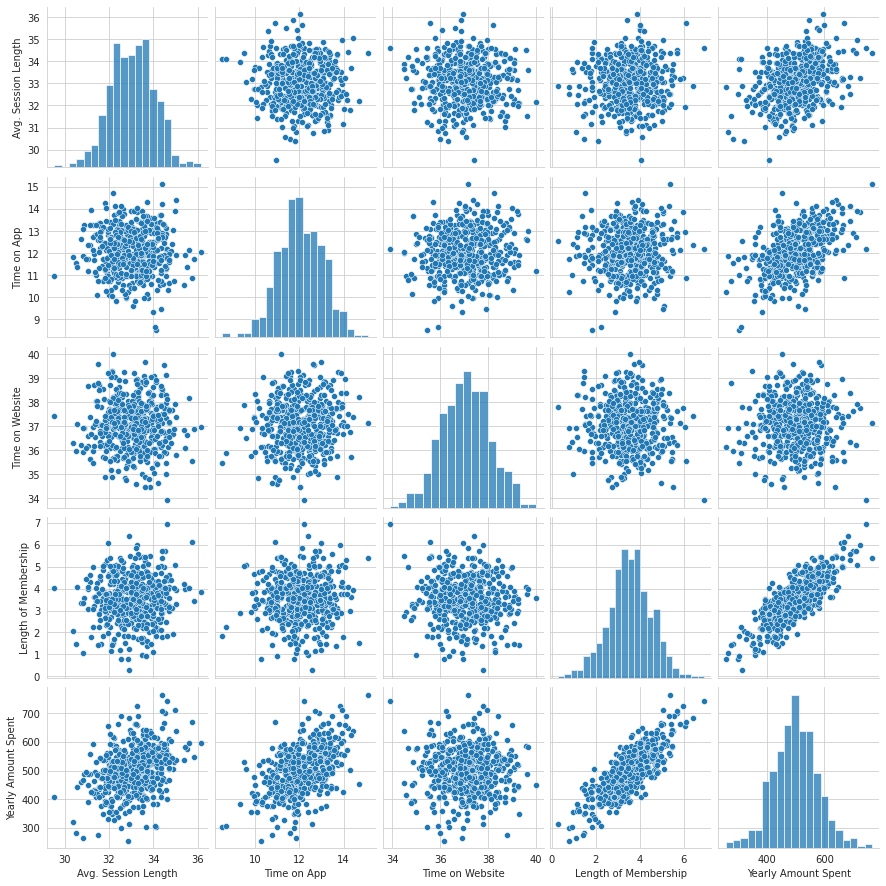

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


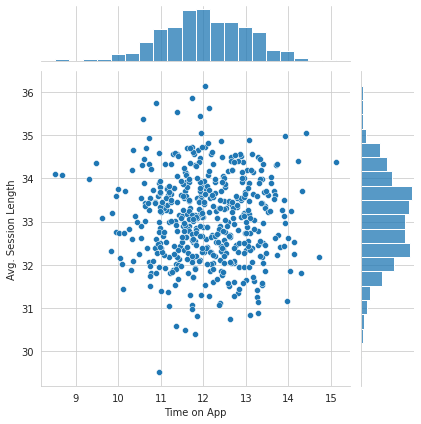

In [11]:
sns.jointplot(x='Time on App',y='Avg. Session Length',data=df)

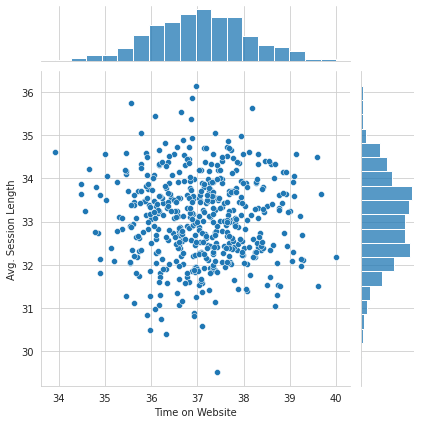

In [12]:
sns.jointplot(x='Time on Website',y='Avg. Session Length',data=df)

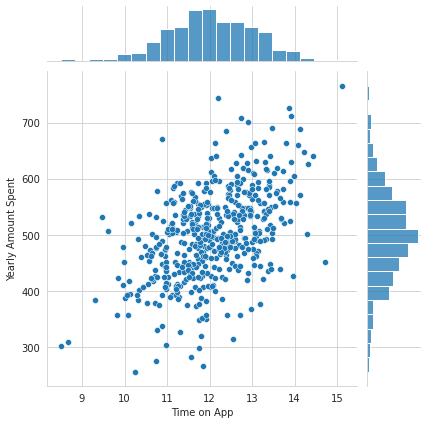

In [13]:
# More time on app, more money spent(Makes sense)
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

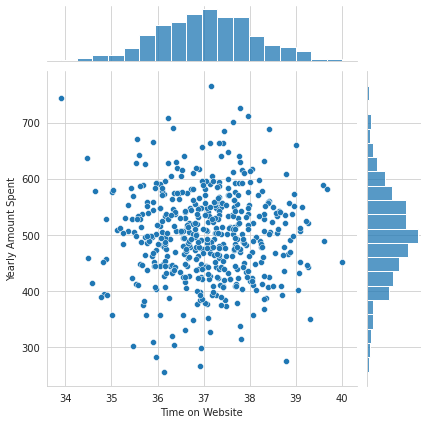

In [14]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

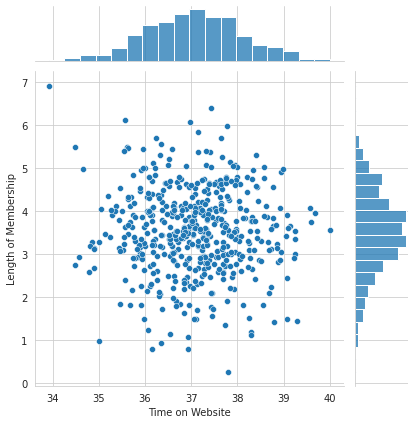

In [15]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=df)

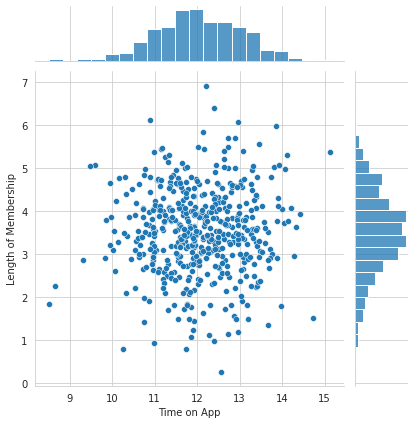

In [16]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df)

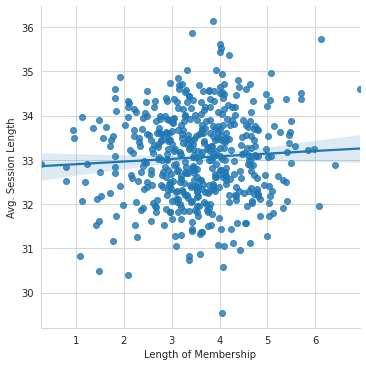

In [17]:
sns.lmplot(x='Length of Membership',y='Avg. Session Length',data=df)

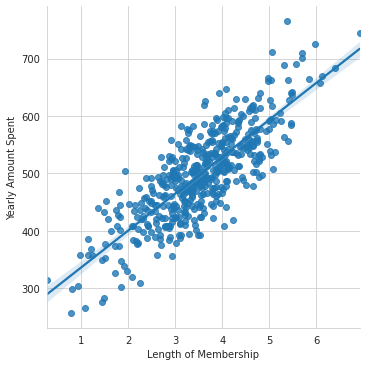

In [18]:
# Length of Membership and Yearly Amount Spent
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

## Splitting Training and Testing Data



In [19]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [20]:
y = df.iloc[ :, -1:]
y.values

array([[587.95105397],
       [392.20493344],
       [487.54750487],
       [581.85234404],
       [599.40609205],
       [637.10244792],
       [521.57217476],
       [549.90414611],
       [570.20040896],
       [427.1993849 ],
       [492.60601272],
       [522.33740461],
       [408.64035107],
       [573.41586733],
       [470.4527333 ],
       [461.7807422 ],
       [457.84769594],
       [407.70454755],
       [452.31567548],
       [605.0610388 ],
       [534.70574381],
       [419.93877484],
       [436.51560573],
       [519.34098913],
       [700.91709162],
       [423.17999168],
       [619.89563986],
       [486.83893477],
       [529.53766534],
       [554.72208383],
       [497.5866713 ],
       [447.68790654],
       [588.71260551],
       [491.07322368],
       [507.44183234],
       [521.88357317],
       [347.77692663],
       [490.73863214],
       [478.17033405],
       [537.84619527],
       [532.75178758],
       [501.87443028],
       [591.19717818],
       [547

In [21]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

- You could either convert these string columns to float or else just drop it ..In this case, we could just drop it instead as these aren't the main features we require.

In [22]:
df = df.drop(['Email','Address','Avatar'],axis=1)


In [23]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [24]:
X = df.iloc[:,:-1]
X.to_numpy()

array([[34.49726773, 12.65565115, 39.57766802,  4.08262063],
       [31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
       ...,
       [32.64677668, 11.49940906, 38.33257633,  4.95826447],
       [33.32250105, 12.39142299, 36.84008573,  2.33648467],
       [33.71598092, 12.41880832, 35.77101619,  2.73515957]])

In [25]:
print(X.shape, y.shape)

(500, 4) (500, 1)


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression Model Training 


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
linear = LinearRegression()

In [30]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# The coefficients
print('Coefficients: \n', linear.coef_)

Coefficients: 
 [[25.72425621 38.59713548  0.45914788 61.67473243]]


In [32]:
# The intercepts
print('Intercepts: \n', linear.intercept_)

Intercepts: 
 [-1050.65367466]


##Training Data Predicts

In [41]:
X_pred = linear.predict(X_train)

Text(0, 0.5, 'Predict_Y')

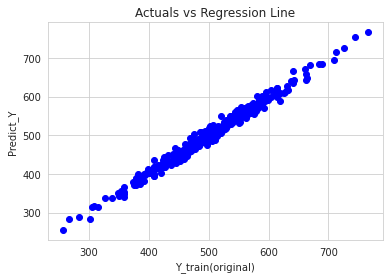

In [77]:
plt.plot(y_train,X_pred,'o',color='Blue')
plt.title("Actuals vs Regression Line")
plt.xlabel('Y_train(original)')
plt.ylabel('Predict_Y')

## Testing Data Predicts


In [48]:
y_pred= linear.predict(X_test)

Text(0, 0.5, 'Predict_Y')

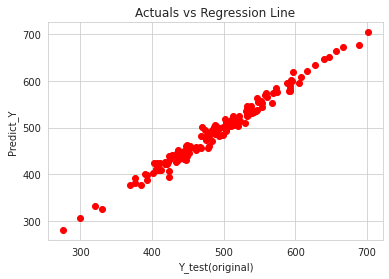

In [78]:
plt.scatter(y_test,y_pred,color='Red')
plt.title("Actuals vs Regression Line")
plt.xlabel('Y_test(original)')
plt.ylabel('Predict_Y')

## Model Evaluation



In [56]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 8.426091641432125
MSE: 103.915541365034
RMSE: 10.193897260863189


In [60]:
# Tells how well the model explains the data it was trained with.
linear.score(X_train,y_train) 
#NOTE : we have nothing to do with this accuracy of the test data.

0.985408598910593

In [51]:
#comparing the predictions of the model against the real labels
linear.score(X_test,y_test)
#So, our chosen model is so good with 98% accuracy

0.9808757641125854

## Residuals



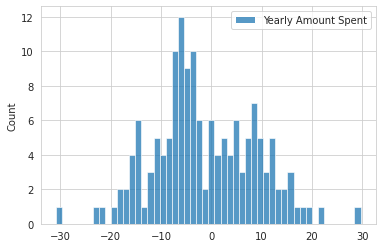

In [64]:
sns.histplot((y_test-y_pred),bins=50);

## Interpreting Regression Coefficients


In [86]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

##Summary

In [99]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
est1 = sm.OLS(y_test, X_test)
est2 = est.fit()


In [100]:
print(est2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          6.146e+04
Date:                 Sun, 27 Jun 2021   Prob (F-statistic):                        0.00
Time:                         07:27:00   Log-Likelihood:                         -2270.3
No. Observations:                  500   AIC:                                      4549.
Df Residuals:                      496   BIC:                                      4565.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

##Data Insights:

-  A unit increase in **Length of Membership** is associated with an increase of 61.27 total dollars spent
-  A unit increase in **Time on App** is associated with an increase of 38.59 total dollars spent.
- A unit increase in **Avg. Session Length** is associated with an increase of 25.98 total dollars spent.
- A unit increase in **Time on Website** is associated with an increase of 0.19 total dollars spent.
- With these information, we might estimate that there's a much time and yearly amount spent more on 'App' than 'Website'
- But it may change aaccordingly depending on many other factors [that is 'Length of Membership', 'Avg Session Length' and others].